In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### CREATING DATA

In [2]:
# creating features
X = np.arange(-50.0,50.0,2.0)

# creating labels
Y = X+10

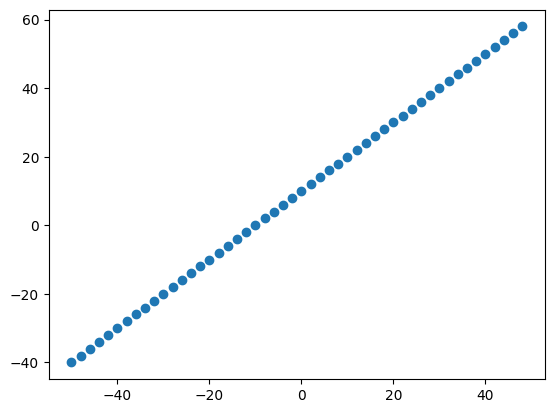

In [3]:
plt.scatter(X,Y)

In [4]:
# relation between X and Y
Y == X+10

#  so we need our model to learn this relation

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### INPUT AND OUTPUT SHAPE

In [5]:
# demo tensor to check input and output shape
house_info = tf.constant(['bedroom' ,'bathroom' ,'garage'])
house_price = tf.constant([939700])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X.shape , Y.shape

((50,), (50,))

In [7]:
print(X[0] , Y[0])
print(X[0].shape , Y[0].shape)

# here we get shape empy when checking for single value becuase we have created a scaler i.e having 1 dimension


-50.0 -40.0
() ()


In [8]:
# converting numpy arrays X and Y inot tensors
X = tf.constant(X)
Y = tf.constant(Y)
X ,Y

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([-50., -48., -46., -44., -42., -40., -38., -36., -34., -32., -30.,
        -28., -26., -24., -22., -20., -18., -16., -14., -12., -10.,  -8.,
         -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,
         16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,
         38.,  40.,  42.,  44.,  46.,  48.])>,
 <tf.Tensor: shape=(50,), dtype=float64, numpy=
 array([-40., -38., -36., -34., -32., -30., -28., -26., -24., -22., -20.,
        -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
          4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
         26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
         48.,  50.,  52.,  54.,  56.,  58.])>)

In [9]:
input_shape  = X[0].shape
output_shape = Y[0].shape
input_shape , output_shape

(TensorShape([]), TensorShape([]))

### HOW TO BUILD A MODEL THAT PREDICTS OUTPUT WHEN WE HAVE SINGLE INPUT i.e INPUT SHAPE IS 1 AND OUTPUT SHAPE IS ALSO 1

Steps in modelling with tensorflow
1. **creating a model**:- define the input and output layers, as well as the number of hideen layers in the moedel
2. **Compiling a model**: -define the loss function (function that tells how wrong it is) and the optimizer (tells the model how to improve patterns and its learning) and the evaluation metrics (what we can use to interpret the preformance of our model)
3. **Fitting the model**:- letting the model try to find patterns between X & Y

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100,activation='relu'),
    # tf.keras.layers.Dense(100,activation='relu'),
    # tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
    ]
)

model.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

model.fit(tf.expand_dims(X,axis=-1) , Y , epochs= 100
          )

Epoch 1/100
2/2 [==============================] - 6s 21ms/step - loss: 9.9831 - mae: 9.9831
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 10.1286 - mae: 10.1286
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 9.8733 - mae: 9.8733
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 9.8580 - mae: 9.8580
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 10.0302 - mae: 10.0302
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 9.6656 - mae: 9.6656
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 9.8363 - mae: 9.8363
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.7991 - mae: 9.7991
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 9.6984 - mae: 9.6984
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 9.6950 - mae: 9.6950
Epoch 11/100
2/2 [==============================] - 0s 15ms/step 

In [11]:
# making prediction
model.predict([48.0])

1/1 [==============================] - 0s 147ms/step


array([[43.939785]], dtype=float32)

### IMPROVING MODEL PERFORMANCE

This can be done by altering the parameters and setps while building the model
1. add more layers
2. increase number of hidden neurons
3. changing activation function
4. changing optimizer/learning rate
5. increase epochs/ give more data for training

In [12]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(100,activation='relu'),

])
model2.compile(loss = "mae" , optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X,axis=-1),Y,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 15ms/step - loss: 7.9195 - mae: 7.9195
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 8.0650 - mae: 8.0650
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 8.4363 - mae: 8.4363
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 7.9351 - mae: 7.9351
Epoch 5/100
2/2 [==============================] - 0s 36ms/step - loss: 8.3726 - mae: 8.3726
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 7.9021 - mae: 7.9021
Epoch 7/100
2/2 [==============================] - 0s 14ms/step - loss: 8.0002 - mae: 8.0002
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 7.9630 - mae: 7.9630
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 7.8622 - mae: 7.8622
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 7.8588 - mae: 7.8588
Epoch 11/100
2/2 [==============================] - 0s 32ms/step - lo

In [13]:
model.predict([48.0])

1/1 [==============================] - 0s 56ms/step


array([[48.591446]], dtype=float32)

### EVALUATING A MODEL

In [14]:
# creating a bigger data set
x = tf.range(-500,500,10)
y = x+2

In [15]:
print(x)
print(y)

tf.Tensor(
[-500 -490 -480 -470 -460 -450 -440 -430 -420 -410 -400 -390 -380 -370
 -360 -350 -340 -330 -320 -310 -300 -290 -280 -270 -260 -250 -240 -230
 -220 -210 -200 -190 -180 -170 -160 -150 -140 -130 -120 -110 -100  -90
  -80  -70  -60  -50  -40  -30  -20  -10    0   10   20   30   40   50
   60   70   80   90  100  110  120  130  140  150  160  170  180  190
  200  210  220  230  240  250  260  270  280  290  300  310  320  330
  340  350  360  370  380  390  400  410  420  430  440  450  460  470
  480  490], shape=(100,), dtype=int32)
tf.Tensor(
[-498 -488 -478 -468 -458 -448 -438 -428 -418 -408 -398 -388 -378 -368
 -358 -348 -338 -328 -318 -308 -298 -288 -278 -268 -258 -248 -238 -228
 -218 -208 -198 -188 -178 -168 -158 -148 -138 -128 -118 -108  -98  -88
  -78  -68  -58  -48  -38  -28  -18   -8    2   12   22   32   42   52
   62   72   82   92  102  112  122  132  142  152  162  172  182  192
  202  212  222  232  242  252  262  272  282  292  302  312  322  332
  342  352  362

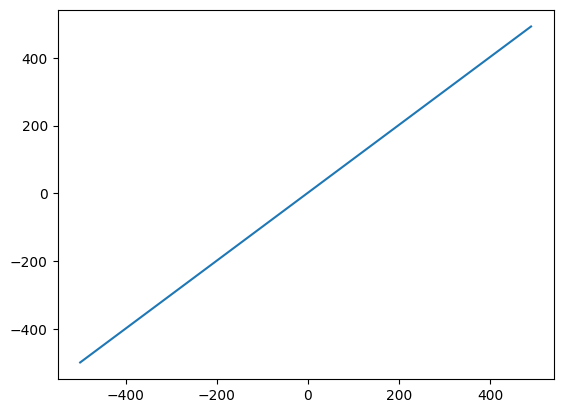

In [16]:
plt.plot(x,y)

### The 3 set rule
`training set` - set on which we train the model(typically 80%)

`validation set` - model gets tuned on this data(typically 10-15%)

`test data` - this is the set on whihc we test the trained model(typically 10-15%)


In [17]:
len(x)

100

In [18]:
from sklearn.model_selection import train_test_split

# Splitting data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Splitting temp set into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


TypeError: ignored

`train_test_split` does not work on tensors it expects numpyarray or list only

In [19]:
x_numpy = x.numpy()
y_numpy = y.numpy()

In [20]:
from sklearn.model_selection import train_test_split

# Splitting data into train and temp sets
X_train, X_temp, y_train, y_temp = train_test_split(x_numpy, y_numpy, test_size=0.2, random_state=42)

# Splitting temp set into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [21]:
X_train.shape , X_test.shape , X_val.shape , y_train.shape,y_test.shape,y_val.shape

((80,), (10,), (10,), (80,), (10,), (10,))

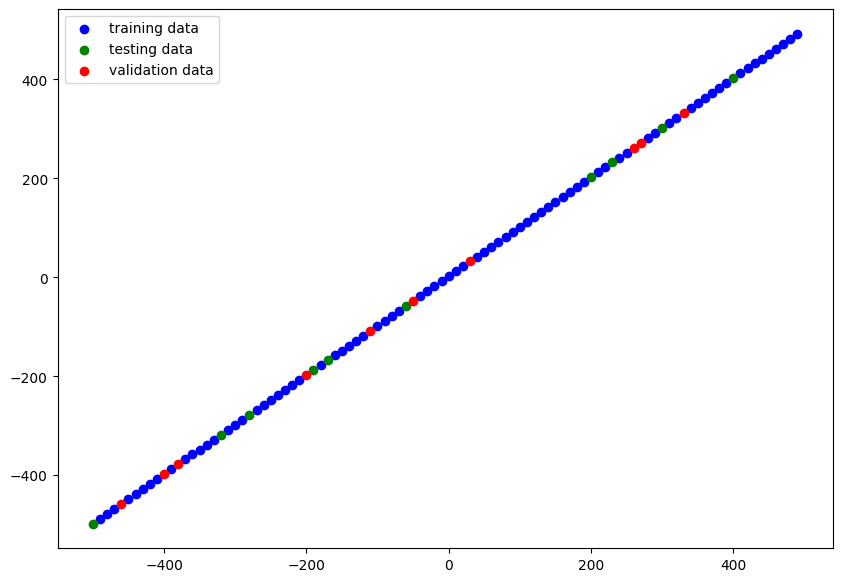

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(X_train , y_train,c='blue',label = 'training data')
plt.scatter(X_test , y_test,c='green',label = 'testing data')
plt.scatter(X_val , y_val,c='red',label = 'validation data')
plt.legend();

### BUILDING MODEL, EVALUATING AND TESTING ON SETS CREATED

In [23]:
#creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

model.compile(loss='mae',optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 32ms/step - loss: 287.7420 - mae: 287.7420
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 332.0749 - mae: 332.0749
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 282.3604 - mae: 282.3604
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 327.0634 - mae: 327.0634
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 263.0904 - mae: 263.0904
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 362.5732 - mae: 362.5732
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 288.4837 - mae: 288.4837
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 329.5956 - mae: 329.5956
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 254.4869 - mae: 254.4869
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 383.4118 - mae: 383.4118
Epoch 11/100
3/3 [===============

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. `total parameter` - number of parameters in model
2. `trainable parameters` - number of parameters that model can update when it trains
3. `non trainable params` - parameters aren't updated during training (typically when bringing already learn patterns or parameters from other model **transfer learning**)

In [50]:
#Creating a model which build automatically by defining the input_shape argument in the first layer
tf.random.set_seed= 42
model  =  tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer") , #here 1 means we are having 1 feature and we are predicting the single output
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=0)

### ANOTHER WAY TO VISUALIZE THE MODEL(DIFFERENT LAYERS OF THE MODEL)

using the plot model function

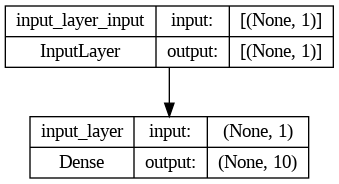

In [53]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

#### VISUALIZING MODEL'S PREDICTION

Often y_true/y_test VS y_pred is plotted

In [54]:
# making some prediction
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [55]:
y_pred

array([[-176.71652 , -188.10362 , -179.6695  , -161.36188 , -184.42534 ,
        -153.06621 , -179.5636  , -183.34859 , -188.14795 , -179.68637 ],
       [ 207.94572 ,  221.35036 ,  211.4304  ,  189.89696 ,  217.02881 ,
         180.12195 ,  211.31563 ,  215.76271 ,  221.39786 ,  211.45844 ],
       [-519.79364 , -553.2923  , -528.4883  , -474.6468  , -542.47906 ,
        -450.234   , -528.1856  , -539.31274 , -553.4185  , -528.5452  ],
       [-197.50906 , -210.23627 , -200.81003 , -180.34885 , -206.12556 ,
        -171.07637 , -200.69221 , -204.92218 , -210.28555 , -200.82933 ],
       [ -62.35747 ,  -66.37407 ,  -63.39654 ,  -56.93358 ,  -65.07411 ,
         -54.01026 ,  -63.356255,  -64.69387 ,  -66.39108 ,  -63.400074],
       [ 239.13455 ,  254.54932 ,  243.1412  ,  218.3774  ,  249.57915 ,
         207.1372  ,  243.00853 ,  248.1231  ,  254.60426 ,  243.17287 ],
       [ 311.9085  ,  332.01358 ,  317.1331  ,  284.8318  ,  325.52994 ,
         270.17282 ,  316.95868 ,  323.63065 

In [59]:
# creating a plotting function (for further use)
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

    """
    Plotting training data , test_data and compares to ground truth labels
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels , c='b',label='Training data')
    plt.scatter(test_data,test_labels,c="g",label="Testing data")
    plt.scatter(test_data,predictions,c="r",label="Predictions")
    plt.legend()

ValueError: ignored

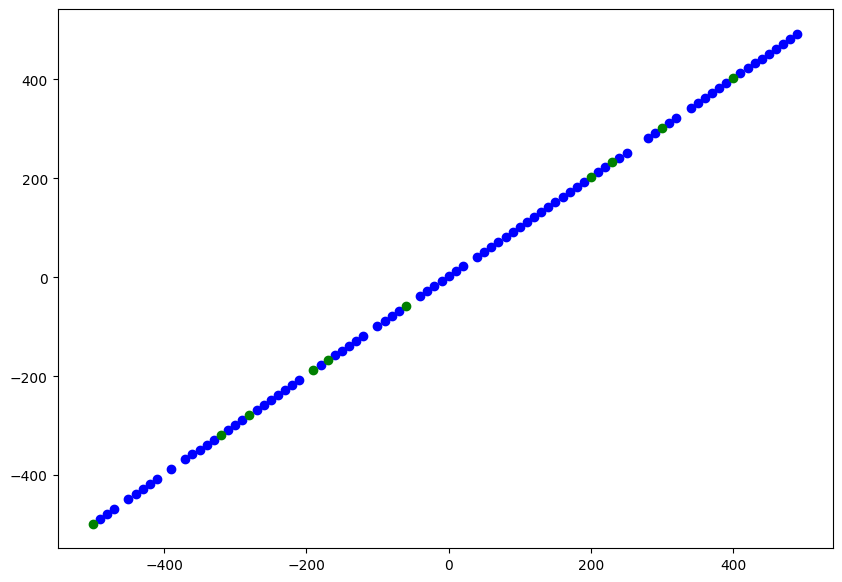

In [61]:
plot_predictions(train_data=X_train,
                 train_labels = y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)